# Evaluate generated dataset

Use our tier-1 SVM classifier to classify the generated documents. See if they're topically faithful to the indicated categories.

In [27]:
import json
from tqdm.notebook import tnrange

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from svm_t1_classifier.iab_classifier_svm import IABClassifier

In [24]:
IAB_CATEGORIES = ["IAB1", "IAB2", "IAB3", "IAB4", "IAB5", "IAB6", "IAB7", "IAB8", "IAB9", "IAB10", "IAB11", "IAB13", "IAB14", "IAB15", "IAB16", "IAB17", "IAB18", "IAB19", "IAB20", "IAB21", "IAB22", "IAB23", "IAB24"]

In [ ]:
classifier = IABClassifier(svm_model_file="/Users/admin/contextual/svm_t1_classifier/t1_model/models/SVM")

In [4]:
classifier.predict_id("study business")

{'IAB3': 1.0389028076029507}

In [8]:
with open("exp/iab-dataset.jsonl", 'r') as f:
    lines = [l.strip() for l in f.readlines()]

In [14]:
labels = []
raw_preds = []
for i in tnrange(len(lines)):
    doc = json.loads(lines[i])
    text = doc['text_b']
    label = doc['label']
    labels.append(label)
    raw_preds.append(classifier.predict_id(text))

/Users/admin/dataless-classification/dino/svm_t1_classifier/iab_classifier_svm.py:148: RuntimeWarning: invalid value encountered in true_divide
  midf = docLens / num_uniq_terms  # MIDF formulation: midf = DFR / DF


In [15]:
# count as collect if the predictions contain the label
correct, wrong = 0, 0
for label, raw_pred in zip(labels, raw_preds):
    if label in raw_pred:
        correct += 1
print(f"Acc: {correct/len(labels)}")

Acc: 0.5097615499254844


In [17]:
top1_preds = list()
for raw_pred in raw_preds:
    sorted_x = sorted(raw_pred.items(), key=lambda kv: kv[1], reverse=True)
    top1 = sorted_x[0][0]
    top1_preds.append(top1)

In [54]:
print(classification_report(y_true=top1_preds, y_pred=labels, labels=IAB_CATEGORIES))

              precision    recall  f1-score   support

        IAB1       0.31      0.35      0.33       535
        IAB2       0.69      0.91      0.78       464
        IAB3       0.16      0.55      0.24       174
        IAB4       0.43      0.57      0.49       458
        IAB5       0.70      0.47      0.56       913
        IAB6       0.55      0.85      0.67       395
        IAB7       0.40      0.61      0.48       398
        IAB8       0.62      0.73      0.67       516
        IAB9       0.20      0.30      0.24       393
       IAB10       0.65      0.91      0.76       436
       IAB11       0.57      0.77      0.65       450
       IAB13       0.58      0.64      0.61       550
       IAB14       0.04      0.11      0.06       225
       IAB15       0.42      0.49      0.45       519
       IAB16       0.77      0.80      0.78       586
       IAB17       0.49      0.68      0.57       435
       IAB18       0.64      0.72      0.68       542
       IAB19       0.53    

In [32]:
mat = confusion_matrix(y_true=top1_preds, y_pred=labels, labels=IAB_CATEGORIES)

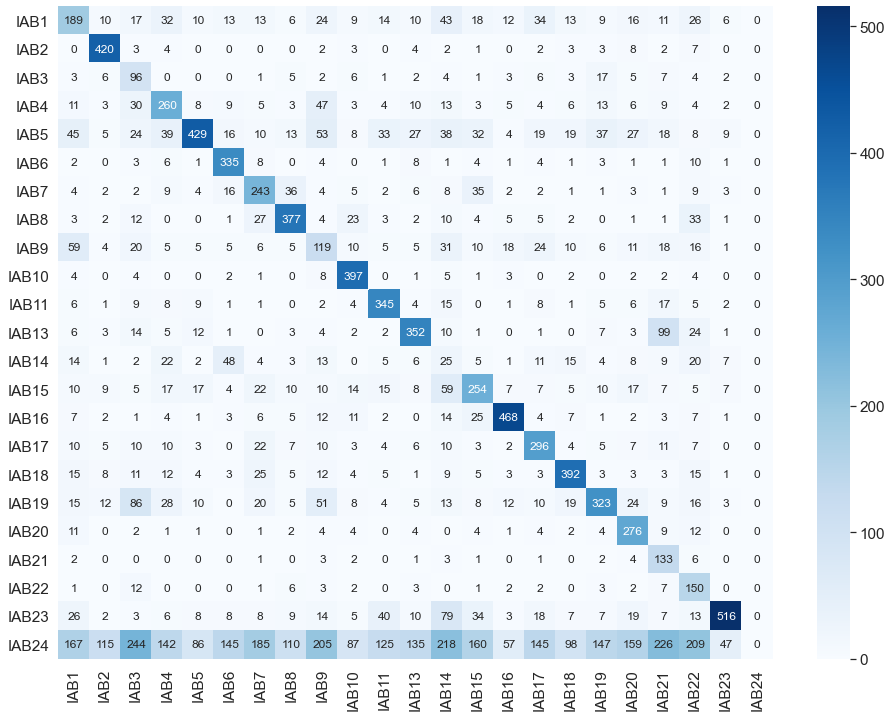

In [43]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(mat, IAB_CATEGORIES, IAB_CATEGORIES)
plt.figure(figsize=(16,12))
#sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap='Blues', fmt='d') # font size
plt.savefig("confusion.png")
plt.show()